# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Marcel Adila Jufai
- **Email:** marceljufai9503@gmail.com
- **ID Dicoding:** marceljufai

## Menentukan Pertanyaan Bisnis

- Which month had the highest O3 level on 2015?
- Which of the pollutant is dominant in the year 2014?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.1 MB/s eta 0:00:00


Mounting Google Drive to Google Collabs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Side note: I'm uploading the whole folder to Google Drive. You don't need to do that. You can just point he file path later to where you save your data CVS File

## Data Wrangling

### Gathering Data

# **Aotizhongxin**

In [3]:
Aoti_df = pd.read_csv("/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Aoti_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

**Checking all data using info()**

In [4]:
Aoti_df.info()
print("================== \n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB



**Chehcking for Null Value in Data**

In [5]:
print("Data Null on Aotizhongxin \n", Aoti_df.isnull().sum())

Data Null on Aotizhongxin 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


**Checking Duplicate Values in Data**

In [6]:
print("Duplicate Data on Aotizhongxin : ", Aoti_df.duplicated().sum())

Duplicate Data on Aotizhongxin :  0


**Describing The Data**

In [7]:
print("Describe the Data on Aotizhongxin \n", Aoti_df.describe(include='all'))

Describe the Data on Aotizhongxin 
                   No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

   

### Cleaning Data

Pada langkah sebelumnya, didapatkan informasi bahwa pada Data terdapat nilai Null yang cujup banyak. Kemudian duplikasi data tidak terlihat atau bernilai 0.

Maka kita akan fokus terhadap Null Values yang ada pada Data. Ada beberapa langkah untuk mengatasi Data Null tersebut. Seperti Dropping, Imputation dan lainnya.

Data dapat dilihat bertipe Data Time Series

In [8]:
Aoti_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

Dalam pengujian diatas, kita dapat lihat bahwa Data ini memiliki waktu yang menyimpan segala perubahan dan kondisi pada saat itu. Bisa dibilang sebagai Data Tine Series. Maka kita akan menggunakan Metode Interpolation untuk mengatasi Data Null

## **Interpolation and Fillna to Null Values in Data**

In [9]:
Aoti_df.interpolate(method='linear', limit_directions='forward', inplace=True)
Aoti_df['wd'].fillna(method='ffill', inplace=True)
Aoti_df.isnull().sum()
#Aoti_df.describe(include='all')

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah kita melakukan Interpolate ke Stasiun Aotizhongxin yang ada di Data serta melakukan ffill terhadap kolom WS [Wind Directions], maka Nilai Null sudah tidak ada ditemukan

## Exploratory Data Analysis (EDA)

### Explore ...

The first question is about how high the level of O3 in Aotizhongxu Station. To show the O3 Level in that station, im going to use the Mean of O3 for each year in thr Data.

Then i used groupby() to calculate the summary statistics. After that i can visualize the data to a line chart

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
16104  16105  2015      1    1     0   13.0   50.0  19.0   29.0   500.0  28.0   
16105  16106  2015      1    1     1   11.0   30.0  15.0   31.0   600.0  27.0   
16106  16107  2015      1    1     2   13.0   33.0  16.0   32.0   600.0  26.0   
16107  16108  2015      1    1     3   10.0   29.0  10.0   25.0   500.0  31.0   
16108  16109  2015      1    1     4   12.0   25.0  14.0   33.0   700.0  24.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
24859  24860  2015     12   31    19   98.0  148.0  28.0  119.0  2600.0   7.0   
24860  24861  2015     12   31    20   98.0  165.0  24.0  113.0  3300.0   8.0   
24861  24862  2015     12   31    21  107.0  187.0  27.0  117.0  4000.0  10.0   
24862  24863  2015     12   31    22  150.0  228.0  38.0  129.0  4900.0  12.0   
24863  24864  2015     12   31    23  193.0  262.0  39.0  127.0  5200.0  12.0   

       TEMP    PRES  DEWP  

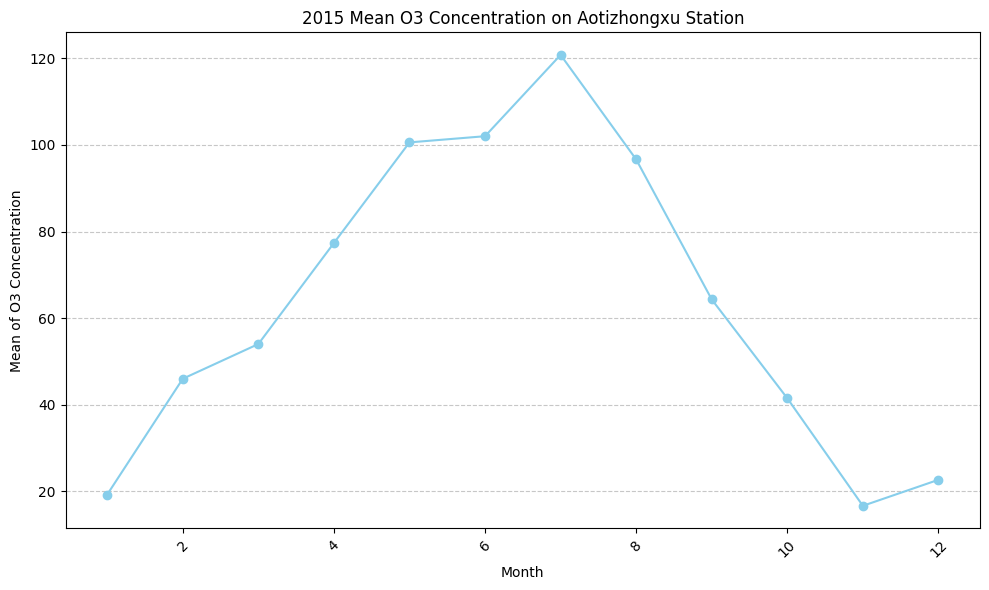

In [10]:
Aoti_year = Aoti_df[Aoti_df['year'] == 2015]
print(Aoti_year)

O3Level_Aoti = Aoti_year.groupby('month')['O3'].mean()
print(O3Level_Aoti)

plt.figure(figsize=(10, 6))
O3Level_Aoti.plot(kind='line', marker='o', color='skyblue', linestyle='-')
plt.title('2015 Mean O3 Concentration on Aotizhongxu Station')
plt.xlabel('Month')
plt.ylabel('Mean of O3 Concentration')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
p_Aoti = Aoti_df.groupby('month')['O3'].mean().reset_index()
print(p_Aoti)

    month         O3
0       1  27.142305
1       2  43.218105
2       3  47.291080
3       4  64.546367
4       5  88.450649
5       6  94.112582
6       7  96.529238
7       8  84.964026
8       9  51.514170
9      10  27.899234
10     11  17.103327
11     12  20.290430


For the second question. I will create the summary statistic using groupby function. Now this Function will Group Wanliu and Shunyi CO Level using the Mean Value to show the CO COncentration level during 2013 to 2017

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
7344    7345  2014      1    1     0   20.0   90.0  18.0   62.0   950.0   7.0   
7345    7346  2014      1    1     1   43.0  348.0  25.0   91.0  1100.0   1.0   
7346    7347  2014      1    1     2   79.0  423.0  41.0  103.0  1800.0   1.0   
7347    7348  2014      1    1     3   82.0  337.0  43.0  101.0  2100.0   1.0   
7348    7349  2014      1    1     4  124.0  594.0  59.0  130.0  2400.0   1.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
16099  16100  2014     12   31    19    9.0   61.0   7.0   22.0   500.0  41.0   
16100  16101  2014     12   31    20    7.0   46.0   7.0   24.0   500.0  39.0   
16101  16102  2014     12   31    21    9.0   52.0   7.0   19.0   500.0  41.0   
16102  16103  2014     12   31    22    6.0   37.0  10.0   20.0   500.0  38.0   
16103  16104  2014     12   31    23    8.0   29.0  22.0   22.0   500.0  35.0   

       TEMP    PRES  DEWP  

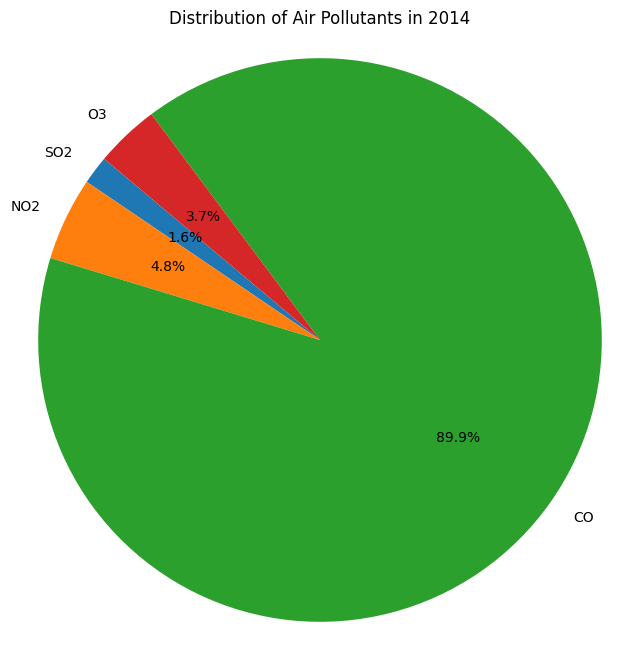

In [12]:
Aoti_year = Aoti_df[Aoti_df['year'] == 2014]
print(Aoti_year)

data_column = ['SO2', 'NO2', 'CO', 'O3']
data_select = Aoti_year[data_column]

sum_values = data_select.sum()

plt.figure(figsize=(8, 8))
plt.pie(sum_values, labels=sum_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Air Pollutants in 2014')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: In Aotizhongxin Station, which year had the highest O3 level on 2015?

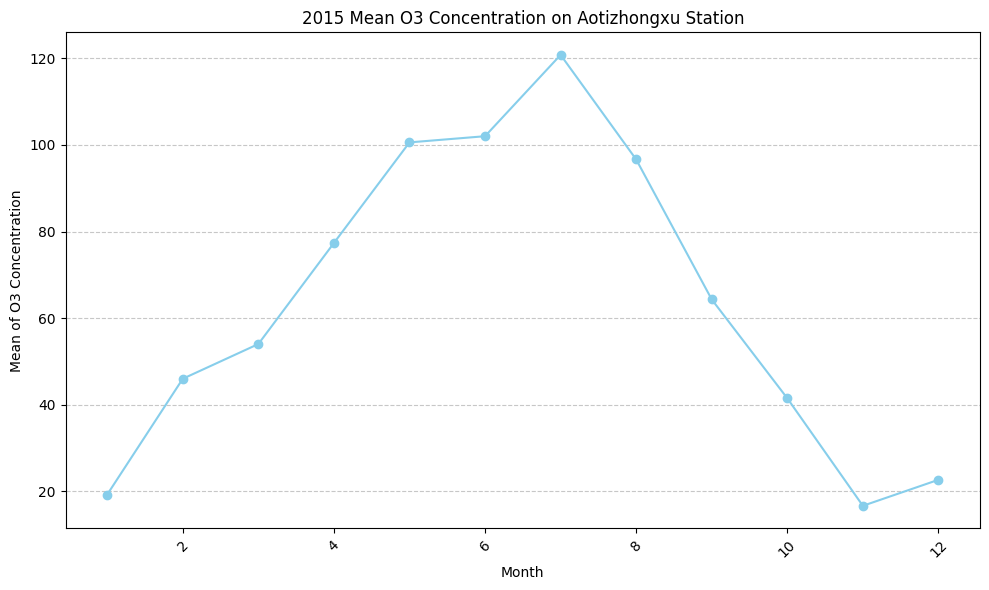

In [13]:
plt.figure(figsize=(10, 6))
O3Level_Aoti.plot(kind='line', marker='o', color='skyblue', linestyle='-')
plt.title('2015 Mean O3 Concentration on Aotizhongxu Station')
plt.xlabel('Month')
plt.ylabel('Mean of O3 Concentration')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the visualization above, it was shown that in 2015 the highest concentration of O3 concentration in the air hit it's peak at the 7th month. Which is July.

Now the way i do this visualitaion is first i filtered the data that has the value in the year column as 2015. After that I create the sumarry statistics using the groupby Function using the month column and O3 column

### Pertanyaan 2: Which of the pollutant is dominant in the year 2014?

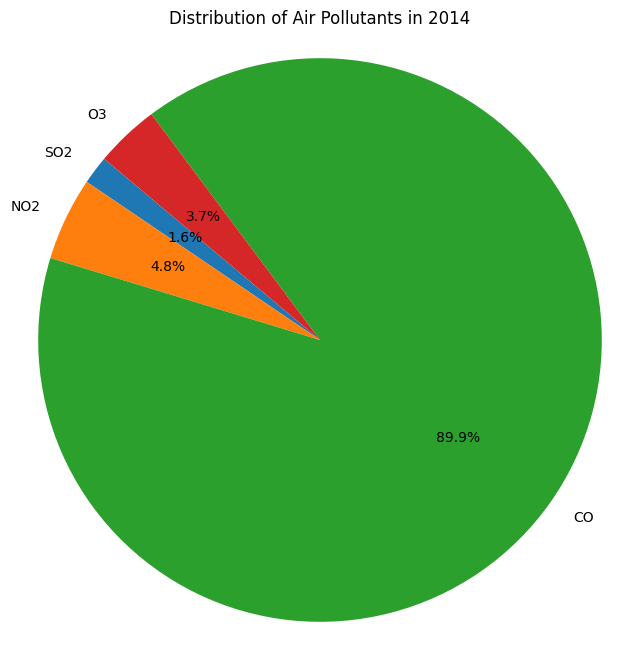

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(sum_values, labels=sum_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Air Pollutants in 2014')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From this visualization, it shows that the CO Pollutant was the dominant one. Which take 89.9% of the total air pollutant in 2014.

Now for the explanation, firstly i filtered the data so the values of year is 2014. Then i select the SO2, NO2, CO and O3 column to create the sumarry statistics. Then i use that statistic to create the pie chart as shown above

## Conclusion

- Pertanyaan 1: Which month had the highest O3 level on 2015?

= Bases on the result that we see on the Line Chart above, we can conclude that the 7th mont **July** had the highest amount of O3 level on that year

- pertanyaan 2: Which of the pollutant is dominant in the year 2014?

= Based on the pie chart, we could see that **CO** had was the dominant pollutant in Aotizhongxiang station in the year 2014 who had the percentage of **89.8%**

# Download it as a CSV File


In [15]:
Aoti_df.isnull().sum()
Aoti_df.head(10)


Aoti_df.to_csv("Aoti.csv", index=False)